**Google Net**

In [1]:
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

<ipython-input-1-6b5e9f384420>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [2]:
import keras
import tensorflow as tf
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten
from keras.layers import concatenate, GlobalAvgPool2D,Dropout
from keras.models import Model

import keras.backend as K

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


In [3]:
labels_diction ={
    'Brain_Tumor_yes' :0,
    'Brain_Tumor_no': 1,
    'chest': 2,
    'Breast_M':3,
    'Breast_benign':4,
    'Kidney_Cyst':5,
    'Kidney_Normal': 6,
    'Kidney_Stone':7,
    'Kidney_Tumor':8
}
labels_diction['chest']

2

In [4]:
os.chdir('/content/drive/MyDrive/DL_Cancer_prediction_images_Dataset/Brain_Tumor_yes')
X = []
y = []
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(0)
    # print(i[0:1])
os.chdir('/content/drive/MyDrive/DL_Cancer_prediction_images_Dataset/Brain_Tumor_no')
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(1)
os.chdir('/content/drive/MyDrive/DL_Cancer_prediction_images_Dataset/chest')
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(2)
os.chdir('/content/drive/MyDrive/DL_Cancer_prediction_images_Dataset/Breast_M')
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(3)
os.chdir('/content/drive/MyDrive/DL_Cancer_prediction_images_Dataset/Breast_benign')
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(4)
os.chdir('/content/drive/MyDrive/DL_Cancer_prediction_images_Dataset/Kidney_Cyst')
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(5)
os.chdir('/content/drive/MyDrive/DL_Cancer_prediction_images_Dataset/Kidney_Normal')
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(6)
os.chdir('/content/drive/MyDrive/DL_Cancer_prediction_images_Dataset/Kidney_Stone')
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(7)
os.chdir('/content/drive/MyDrive/DL_Cancer_prediction_images_Dataset/Kidney_Tumor')
for i in os.listdir():
    img = cv2.imread(i)
    img = cv2.resize(img,(227,227))
    X.append(img)
    y.append(8)
print(X)
print(y)

[array([[[152, 152, 152],
        [ 99,  99,  99],
        [ 14,  14,  14],
        ...,
        [ 13,  13,  13],
        [  9,   9,   9],
        [ 20,  20,  20]],

       [[131, 131, 131],
        [ 93,  93,  93],
        [  9,   9,   9],
        ...,
        [ 15,  15,  15],
        [  5,   5,   5],
        [ 21,  21,  21]],

       [[134, 134, 134],
        [138, 138, 138],
        [  4,   4,   4],
        ...,
        [  7,   7,   7],
        [ 10,  10,  10],
        [ 18,  18,  18]],

       ...,

       [[ 11,  11,  11],
        [ 18,  18,  18],
        [ 11,  11,  11],
        ...,
        [ 18,  18,  18],
        [ 14,  14,  14],
        [ 12,  12,  12]],

       [[ 12,  12,  12],
        [ 19,  19,  19],
        [ 12,  12,  12],
        ...,
        [ 15,  15,  15],
        [  3,   3,   3],
        [  9,   9,   9]],

       [[ 11,  11,  11],
        [ 18,  18,  18],
        [ 14,  14,  14],
        ...,
        [  9,   9,   9],
        [ 20,  20,  20],
        [  8,   8,   8]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

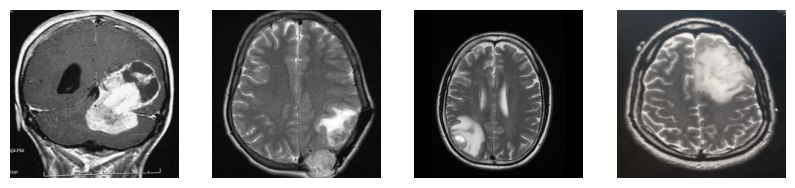

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(X[i],cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)#random state defines the shuffling process
for i in X_train:
  print(i.shape)
for i in X_test:
  print(i.shape)

In [7]:
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)

In [8]:
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (1088, 227, 227, 3)
X_test Shape:  (536, 227, 227, 3)
y_train Shape:  (1088,)
y_test Shape:  (536,)


In [9]:
x_train_scaled = X_train / 255
x_test_scaled = X_test / 255

In [10]:
def googlenet(input_shape, n_classes):

  def inception_block(x,f):
    t1 = Conv2D(f[0],1,activation='relu')(x)

    t2 = Conv2D(f[1],1,activation='relu')(x)
    t2 = Conv2D(f[2],3,padding='same',activation='relu')(t2)

    t3 = Conv2D(f[3],1,activation='relu')(x)
    t3 = Conv2D(f[4],5,padding='same',activation='relu')(t3)

    t4 = MaxPool2D(3,strides=1,padding='same')(x)
    t4 = Conv2D(f[5],1,activation='relu')(t4)

    output = concatenate([t1,t2,t3,t4])

    return output

  input = Input(input_shape)

  x = Conv2D(64,7,strides=2,padding='same',activation='relu')(input)
  x = Conv2D(64,3,padding='same',activation='relu')(x)
  x = MaxPool2D(2,strides=2,padding='same')(x)

  x = Conv2D(64,1,activation='relu')(x)
  x = Conv2D(192,3,activation='relu',padding='same')(x)
  x = MaxPool2D(3,strides=2,padding='same')(x)

  x = inception_block(x,[64,96,128,16,32,32])
  x = inception_block(x,[128,128,192,32,96,64])
  x = MaxPool2D(3,strides=2,padding='same')(x)

  x = inception_block(x,[192,96,208,16,48,64])
  x = inception_block(x,[160,112,224,24,64,64])
  x = inception_block(x,[128,128,256,24,64,64])
  x = inception_block(x,[112,144,288,32,64,64])
  x = inception_block(x,[256,160,320,32,128,128])
  x = MaxPool2D(3,strides=2,padding='same')(x)

  x = inception_block(x,[256,160,320,32,128,128])
  x = inception_block(x,[384,192,384,48,128,128])

  x = GlobalAvgPool2D()(x)
  x = Dropout(0.4)(x)

  output = Dense(n_classes,activation='softmax')(x)

  model = Model(input,output)
  return model

In [11]:
 input_shape = 227,227,3
 n_classes = 9
 K.clear_session()
 model = googlenet(input_shape,n_classes)
 model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 227, 227, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 114, 114, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 114, 114, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [12]:
from tensorflow import keras
#Compiling the model (Adding optimizer and evaluating the metrics)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=["accuracy"])

In [13]:
history = model.fit(x_train_scaled,y_train,validation_data=(X_test,y_test),verbose=1,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


34/34 [==============================] - 45s 232ms/step - loss: 2.2008 - accuracy: 0.1250 - val_loss: 65.7675 - val_accuracy: 0.1045
Epoch 2/100
34/34 [==============================] - 6s 168ms/step - loss: 1.8999 - accuracy: 0.2546 - val_loss: 216.4819 - val_accuracy: 0.1045
Epoch 3/100
34/34 [==============================] - 6s 174ms/step - loss: 1.5383 - accuracy: 0.3465 - val_loss: 166.9496 - val_accuracy: 0.1754
Epoch 4/100
34/34 [==============================] - 5s 150ms/step - loss: 1.2281 - accuracy: 0.4660 - val_loss: 159.4388 - val_accuracy: 0.4664
Epoch 5/100
34/34 [==============================] - 6s 171ms/step - loss: 1.0089 - accuracy: 0.5643 - val_loss: 218.6565 - val_accuracy: 0.4646
Epoch 6/100
34/34 [==============================] - 5s 152ms/step - loss: 0.9056 - accuracy: 0.6388 - val_loss: 197.4882 - val_accuracy: 0.4608
Epoch 7/100
34/34 [==============================] - 5s 152ms/step - loss: 0.6934 - accuracy: 0.7169 - val_loss: 73.1282 - val_accuracy: 0.703

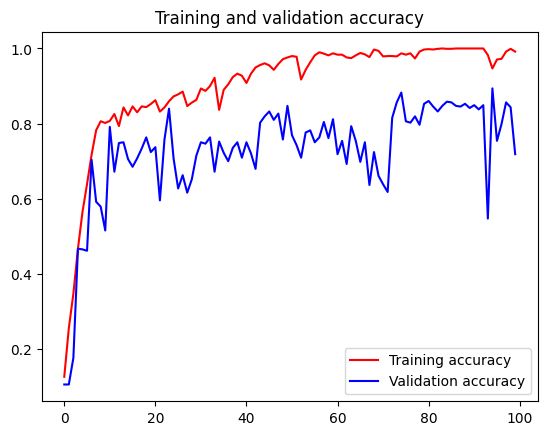

<Figure size 640x480 with 0 Axes>

In [14]:
# history = model.fit(X_train,y_train,epochs=5, validation_data=(X_test,y_test),verbose = 1,initial_epoch=0)
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [15]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)


17/17 [==============================] - 1s 50ms/step - loss: 0.8175 - accuracy: 0.9198


In [16]:
print(test_accuracy)

0.9197761416435242


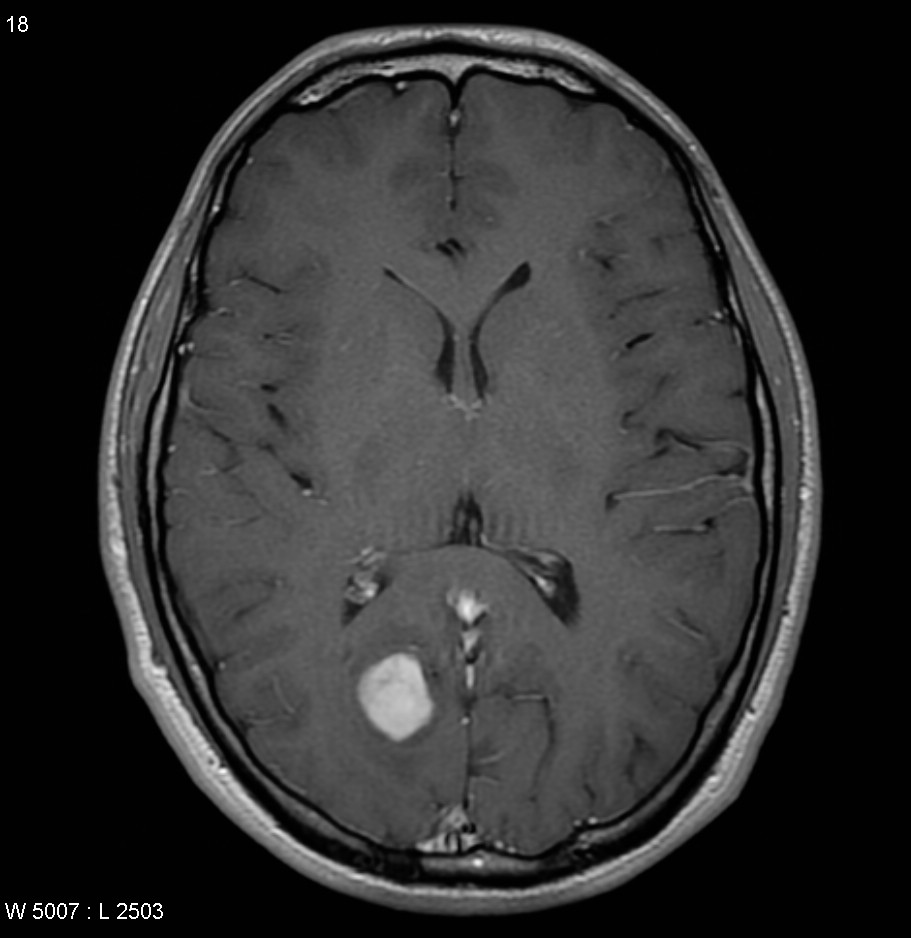

In [25]:
import PIL
image_shape=(227,227)
path='/content/drive/MyDrive/DL_Cancer_prediction_images_Dataset/Validation/Y6.jpg'
test_image = PIL.Image.open(path)
test_image

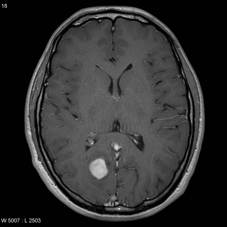

In [26]:
resized_ti = PIL.Image.open(path).resize(image_shape)
resized_ti

In [27]:
resized_ti=np.array(resized_ti)/255.0
resized_ti.shape

(227, 227, 3)

In [28]:
resized_ti[np.newaxis,...].shape

(1, 227, 227, 3)

In [29]:
model.predict(resized_ti[np.newaxis,...])

1/1 [==============================] - 0s 33ms/step


array([[9.9999201e-01, 8.1573762e-07, 2.9062127e-14, 3.5283599e-06,
        2.3853353e-13, 1.2178978e-07, 1.9176199e-11, 3.4702573e-06,
        2.4743521e-08]], dtype=float32)

In [30]:
result=model.predict(resized_ti[np.newaxis,...])

1/1 [==============================] - 0s 27ms/step


In [31]:
print(np.argmax(result))

0


In [32]:
value = {i for i in labels_diction if labels_diction[i]==np.argmax(result) }
print(value)

{'Brain_Tumor_yes'}


# **Alex Net**

In [33]:
import os,glob
import cv2
import tensorflow as tf
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout, Activation, MaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [34]:
def alexnet(input_shape, n_classes):
  input = Input(input_shape)

  # actually batch normalization didn't exist back then
  # they used LRN (Local Response Normalization) for regularization
  x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)

  x = Conv2D(256, 5, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)

  x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)

  x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)

  x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = MaxPool2D(3, strides=2)(x)

  x = Flatten()(x)
  x = Dense(4096, activation='relu')(x)
  x = Dense(4096, activation='relu')(x)

  output = Dense(n_classes, activation='softmax')(x)

  model = Model(input, output)
  return model

In [35]:
 input_shape = 227,227,3
 n_classes = 9
 K.clear_session()
 model = alexnet(input_shape,n_classes)
 model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 57, 57, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 57, 57, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 256)      1024  

In [40]:
from tensorflow import keras
tf.keras.optimizers.experimental.SGD
#Compiling the model (Adding optimizer and evaluating the metrics)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=["accuracy"])

In [41]:
history = model.fit(x_train_scaled,y_train,validation_data=(X_test,y_test),verbose=1,epochs=100)

Epoch 1/100
34/34 [==============================] - 7s 74ms/step - loss: 0.1685 - accuracy: 0.9568 - val_loss: 4335.9409 - val_accuracy: 0.2444
Epoch 2/100
34/34 [==============================] - 2s 61ms/step - loss: 0.1376 - accuracy: 0.9568 - val_loss: 2523.4753 - val_accuracy: 0.2369
Epoch 3/100
34/34 [==============================] - 2s 58ms/step - loss: 0.1353 - accuracy: 0.9596 - val_loss: 425.5343 - val_accuracy: 0.6250
Epoch 4/100
34/34 [==============================] - 2s 61ms/step - loss: 0.0858 - accuracy: 0.9605 - val_loss: 945.2589 - val_accuracy: 0.6194
Epoch 5/100
34/34 [==============================] - 2s 58ms/step - loss: 0.0225 - accuracy: 0.9917 - val_loss: 2645.0608 - val_accuracy: 0.4440
Epoch 6/100
34/34 [==============================] - 2s 58ms/step - loss: 0.0499 - accuracy: 0.9825 - val_loss: 3639.8784 - val_accuracy: 0.2668
Epoch 7/100
34/34 [==============================] - 2s 62ms/step - loss: 0.0530 - accuracy: 0.9807 - val_loss: 582.9807 - val_accur

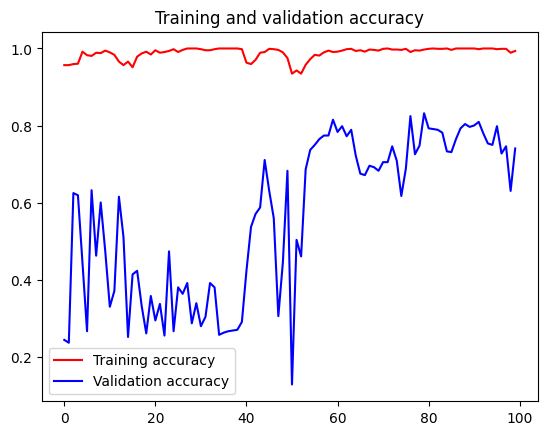

<Figure size 640x480 with 0 Axes>

In [42]:
# history = model.fit(X_train,y_train,epochs=5, validation_data=(X_test,y_test),verbose = 1,initial_epoch=0)
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [43]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)


17/17 [==============================] - 1s 25ms/step - loss: 0.2479 - accuracy: 0.9683


In [44]:
print(test_accuracy)

0.9682835936546326


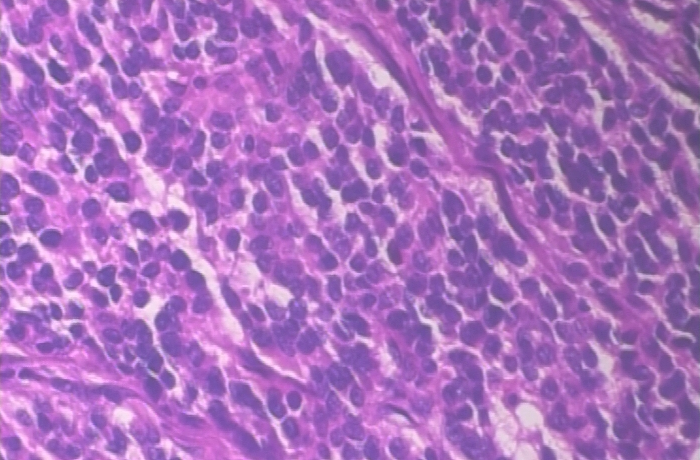

In [60]:
import PIL
image_shape=(227,227)
path='/content/drive/MyDrive/DL_Cancer_prediction_images_Dataset/Validation/SOB_M_DC-14-2773-200-024.png'
test_image = PIL.Image.open(path)
test_image

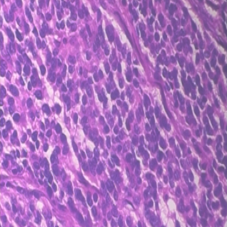

In [61]:
resized_ti = PIL.Image.open(path).resize(image_shape)
resized_ti

In [62]:
resized_ti=np.array(resized_ti)/255.0
resized_ti.shape

(227, 227, 3)

In [63]:
model.predict(resized_ti[np.newaxis,...])

1/1 [==============================] - 0s 20ms/step


array([[6.4853000e-21, 9.1560932e-24, 5.2904966e-31, 1.0000000e+00,
        4.0135571e-17, 1.8732351e-29, 1.4748696e-36, 8.7638156e-30,
        0.0000000e+00]], dtype=float32)

In [64]:
result=model.predict(resized_ti[np.newaxis,...])

1/1 [==============================] - 0s 35ms/step


In [65]:
print(np.argmax(result))

3


In [66]:
value = {i for i in labels_diction if labels_diction[i]==np.argmax(result) }
print(value)

{'Breast_M'}
